In [1]:
'''
Author:Yujia Li
Date:2025/10/16
Project:HW3_MY_DATA_MY_MODEL
'''

'\nAuthor:Yujia Li\nDate:2025/10/16\nProject:HW3_MY_DATA_MY_MODEL\n'

In [2]:
import nest_asyncio
nest_asyncio.apply()

# 各地区异常点识别

In [4]:
block_lst = ["YiZhuang", "MaJuQiao", "YanJiao"]
data_lst = ["Rent", "Price"]

for block_name in block_lst:
    for data_batch in data_lst:
        %run data_process.ipynb

YiZhuang地区Rent共有1200条数据，异常行数0条
其中有1个2sigma异常点，26个3sigma异常点
YiZhuang地区Price共有1200条数据，异常行数0条
其中有33个2sigma异常点，11个3sigma异常点
MaJuQiao地区Rent共有714条数据，异常行数0条
其中有24个2sigma异常点，12个3sigma异常点
MaJuQiao地区Price共有1200条数据，异常行数0条
其中有59个2sigma异常点，3个3sigma异常点
YanJiao地区Rent共有205条数据，异常行数0条
其中有0个2sigma异常点，7个3sigma异常点
YanJiao地区Price共有422条数据，异常行数0条
其中有0个2sigma异常点，3个3sigma异常点


# 真值数据的租售比

In [6]:
target = "all_data"

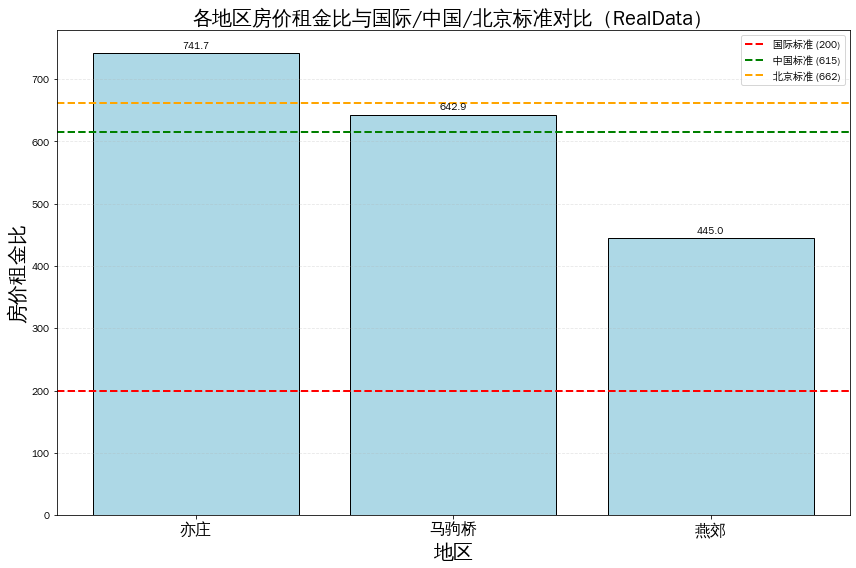

In [7]:
%run ratio_bar.ipynb

由于有一位同学较晚提交爬虫数据，故此处仅展示3个地区数据。在国际标准基础上，我查阅了中国和北京地区的平均租售比，会发现即使是在北京边郊地区，中国租售比也远高于国际标准。

# 线性回归结果

## 房屋价格回归结果

In [10]:
data_batch = "Price"

In [11]:
%run linear_regression.ipynb

线性回归模型评估结果
R方 (R²): 0.7537
调整后R方 (Adjusted R²): 0.7536

系数估计和显著性检验:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     4314.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:27:33   Log-Likelihood:                -46155.
No. Observations:                2822   AIC:                         9.232e+04
Df Residuals:                    2819   BIC:                         9.233e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

## 房屋租金回归结果

In [13]:
data_batch = "Rent"

In [14]:
%run linear_regression.ipynb

线性回归模型评估结果
R方 (R²): 0.9269
调整后R方 (Adjusted R²): 0.9268

系数估计和显著性检验:
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                -22758.
No. Observations:                2119   AIC:                         4.552e+04
Df Residuals:                    2116   BIC:                         4.554e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

# 非线性回归结果

## 房屋价格回归结果

In [17]:
data_batch = "Price"

In [18]:
%run nonlinear_regression.ipynb

生成的特征项: ['space' 'location' 'space^2' 'space location' 'location^2']

模型评估指标
R方 (R-squared): 0.801061
调整R方 (Adjusted R-squared): 0.800707
均方根误差 (RMSE): 2756983.530103
样本数量: 2822
特征数量: 5

详细统计摘要
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2268.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                -45854.
No. Observations:                2822   AIC:                         9.172e+04
Df Residuals:                    2816   BIC:                         9.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                

## 房屋租金回归结果

In [20]:
data_batch = "Rent"

In [21]:
%run nonlinear_regression.ipynb

生成的特征项: ['space' 'location' 'space^2' 'space location' 'location^2']

模型评估指标
R方 (R-squared): 0.970007
调整R方 (Adjusted R-squared): 0.969936
均方根误差 (RMSE): 7152.601716
样本数量: 2119
特征数量: 5

详细统计摘要
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.367e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                -21813.
No. Observations:                2119   AIC:                         4.364e+04
Df Residuals:                    2113   BIC:                         4.367e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 co

在两种回归方法中，会发现加入平方项和交叉项的非线性回归模型R^2显著高于线性回归模型。其中，房价预测中，非线性模型与线性模型R^2分别为0.8011和0.7537；在租金预测中，两者分别为0.9700和0.9269。进一步观察，会发现space*location的交叉项和space^2项在两个预测回归中都显现出统计学显著，其中前者显著为负值，后者显著为正值。

但这个回归结果和现实直观感觉有些不符。一般来讲，房屋面积和单价会呈现一个开口向下的抛物线型，因为当房屋面积足够大时，单位房屋带来的边际效用相对减少，所以消费者愿意付得钱也相应降低，所以平方项的系数理应为负。所以在北京边郊地区可能有别的机制正在影响房价与租金。

而交互项则表明了房价与租金的地区异质性。表明在3个不同地区，房价与租金存在显著的差别。

# 线性回归预测值租售比

In [23]:
target = "linear_result"

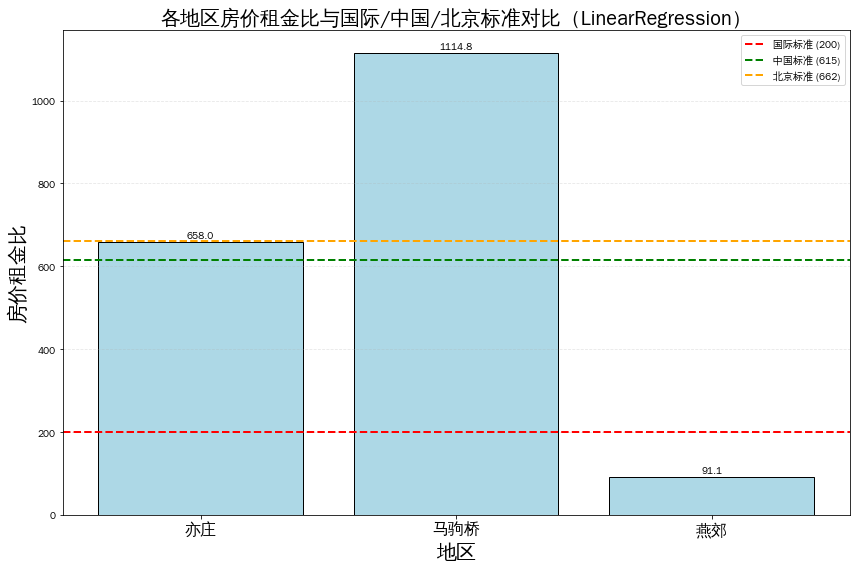

In [24]:
%run ratio_bar.ipynb

In [25]:
# 非线性回归预测值租售比

In [26]:
target = "nonlinear_result"

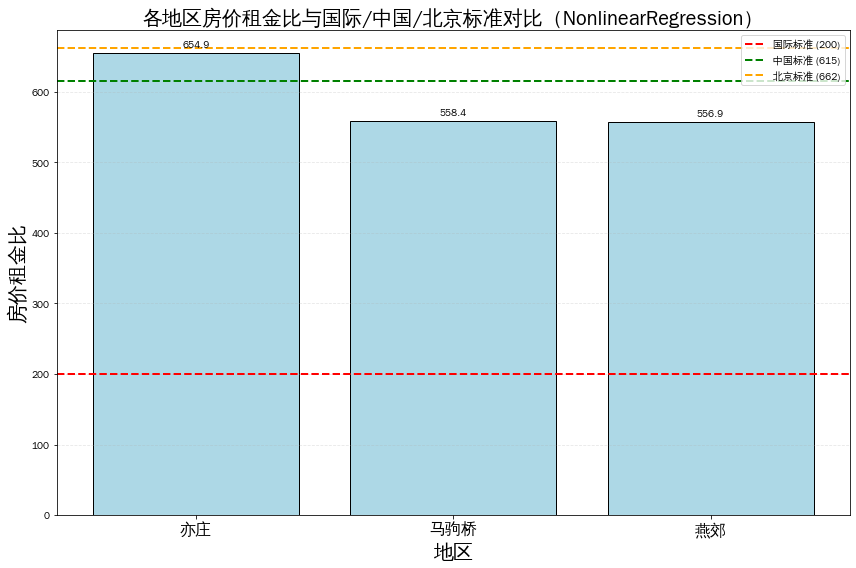

In [27]:
%run ratio_bar.ipynb

根据前文分析，会发现非线性模型更符合房价、租金的现状。所以相应的，在预测能力上，会发现非线性模型的表现明显更好。在租售比的对比中，会发现非线性回归预测模型的租售比情况与真实情况基本一致，但xian'xi